In [1]:
import synthpop 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/Users/mhuston/anaconda3/lib/python3.11/site-packages/pydantic/_internal/_config.py:341: UserWarning: Valid config keys have changed in V2:
* 'keep_untouched' has been renamed to 'ignored_types'
  warnings.warn(message, UserWarning)


## Initialize your model + populations, so we can examine it.

In [4]:
model = synthpop.SynthPop('my_config.synthpop_conf', extinction_map_kwargs={"name":"gums"})
model.init_populations()



################################ Settings #################################
# reading default parameters from
default_config_file =  /Users/mhuston/Documents/synthpop/synthpop/config_files/_default.synthpop_conf 
# read configuration from 
config_file = '/Users/mhuston/Documents/synthpop/synthpop/config_files/my_config.synthpop_conf' 


# copy the following to a config file to redo this model generation -------
{
    "l_set": [
        1
    ],
    "l_set_type": "list",
    "b_set": [
        1
    ],
    "b_set_type": "list",
    "name_for_output": "default_synthpop",
    "model_name": "besancon_Robin2003",
    "solid_angle": 0.0001,
    "solid_angle_unit": "deg^2",
    "random_seed": 1786379316,
    "sun": {
        "x": -8.178,
        "y": 0.0,
        "z": 0.017,
        "u": 12.9,
        "v": 245.6,
        "w": 7.78,
        "l_apex_deg": 56.24,
        "b_apex_deg": 22.54
    },
    "lsr": {
        "u_lsr": 1.8,
        "v_lsr": 233.4,
        "w_lsr": 0.53
    },
    "warp

## Extinction

In [7]:
ext_maps = [model.populations[i].extinction.extinction_map_name for i in range(len(model.populations))]
if len(np.unique(ext_maps))==1:
    print("One extinction module is used for all populations:", ext_maps[0])
ext_map_name = ext_maps[0]
ext_mod = model.populations[0].extinction
ls = np.linspace(-180,180,361)
bs = np.linspace(-90,90,181)
l_all, b_all = [x.flatten() for x in np.meshgrid(ls,bs)]
ext_grid = ext_mod.extinction_in_map(l_all,b_all, np.repeat(8.0, len(l_all))).reshape(len(bs),len(ls))
ext_unit = ext_mod.A_or_E_type

One extinction module is used for all populations: GUMS


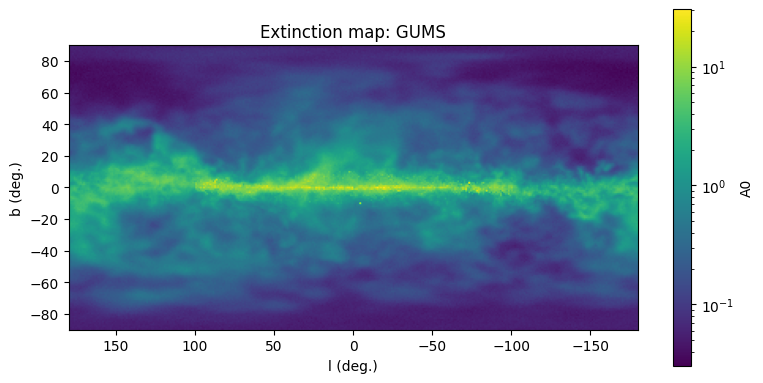

In [8]:
plt.figure(figsize=(8,4))
plt.imshow(ext_grid, origin='lower', norm='log', extent = [-180,180,-90,90])
plt.colorbar(label=ext_unit)
plt.gca().invert_xaxis()
plt.title("Extinction map: "+ext_map_name)
plt.xlabel('l (deg.)'); plt.ylabel('b (deg.)')
plt.tight_layout()

One extinction law is used for all populations: SODC


Text(0.5, 1.0, 'Extinction Law: SODC, $\\lambda_{ref}$=0.549')

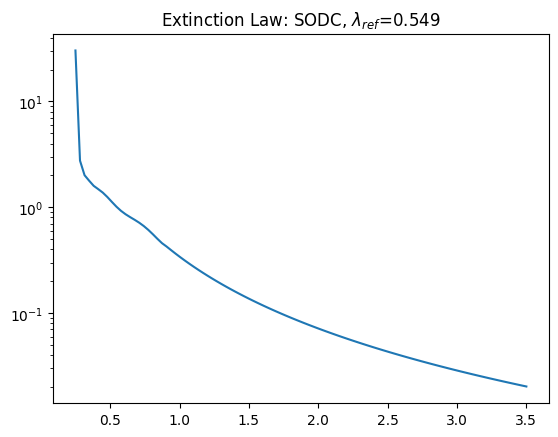

In [7]:
ext_laws = [model.populations[i].extinction.extinction_law_name for i in range(len(model.populations))]
if len(np.unique(ext_laws))==1:
    print("One extinction law is used for all populations:", ext_laws[0])
ext_law_name = ext_laws[0]
ext_law = model.populations[0].extinction

lambd = np.linspace(ext_law.min_wavelength, ext_law.max_wavelength, 100)
plt.plot(lambd, [ext_law.Alambda_Aref(x) for x in lambd])
plt.yscale('log')
plt.title('Extinction Law: '+ext_law_name+r', $\lambda_{ref}$='+str(ext_law.law_ref_wavelength))

Next, let's look at the population density for each population.

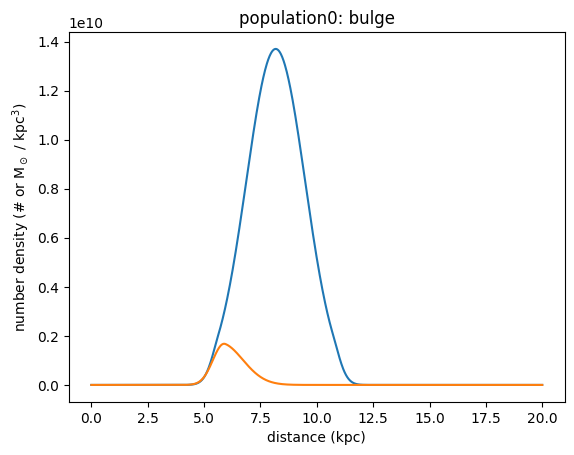

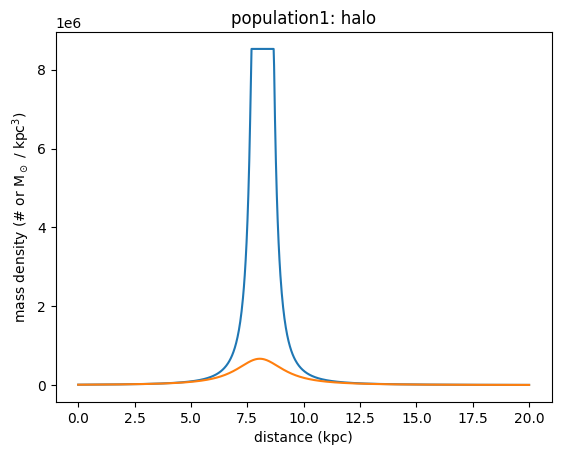

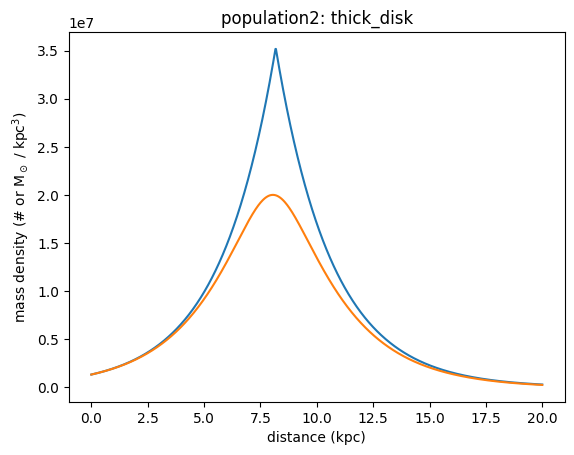

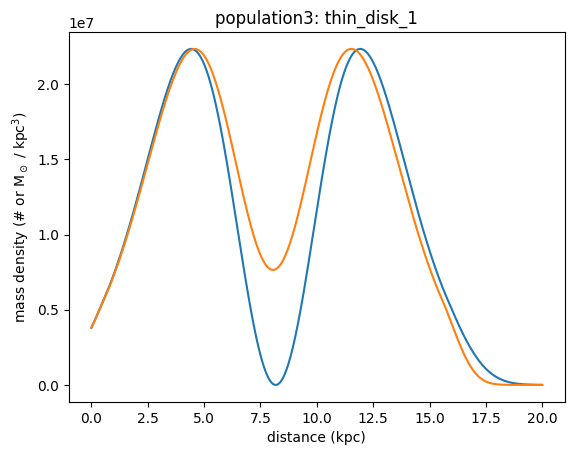

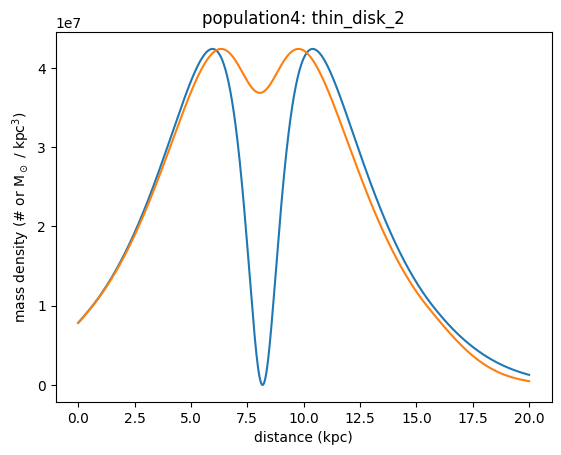

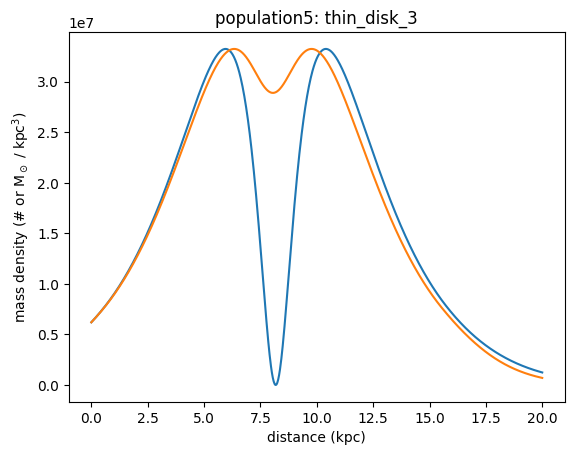

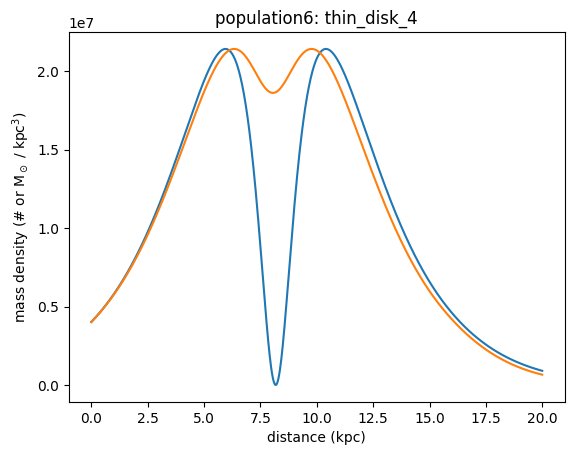

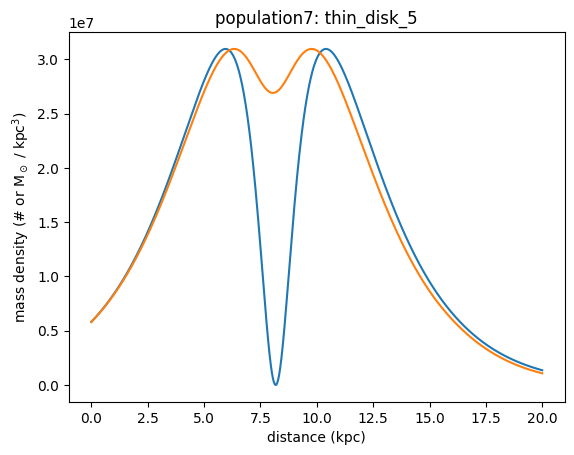

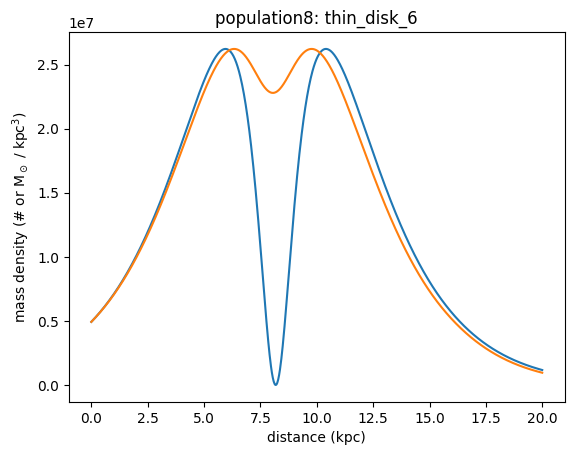

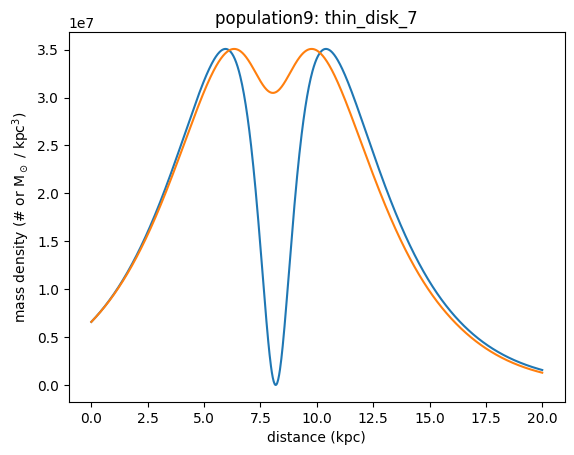

In [8]:
n_r = 1000
ls,bs = [0,10], [0,0]
dists = np.linspace(0,20,n_r)
for i,pop in enumerate(model.populations):
    plt.figure()
    plt.title('population'+str(i)+': '+pop.name)
    for j in range(len(ls)):
        l,b = ls[j],bs[j]
        r,phi,z = pop.coord_trans.dlb_to_rphiz(dists,l,b)
        plt.plot(dists, pop.population_density.density(r,phi,z))
    plt.ylabel(pop.population_density.density_unit+r' density (# or M$_\odot$ / kpc$^3$)'); plt.xlabel('distance (kpc)')